In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Models for Forecasting

#### Getting the coffee example into Python and plotting the trend.

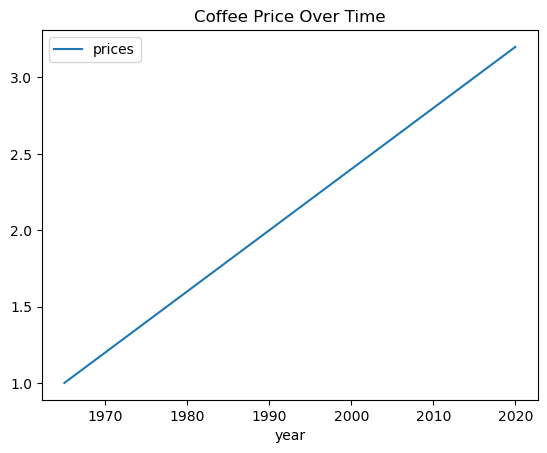

In [2]:
years = [1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]
prices = [1.00, 1.20, 1.40, 1.60, 1.80, 2.00, 2.20, 2.40, 2.60, 2.80, 3.00, 3.20]

data = pd.DataFrame({
    'year' : years,
    'prices': prices
})

ax = data.plot.line(x='year')
ax.set_title('Coffee Price Over Time', fontsize=12)
plt.show()

#### Getting the hot chocolate example into Python and plotting the trend.

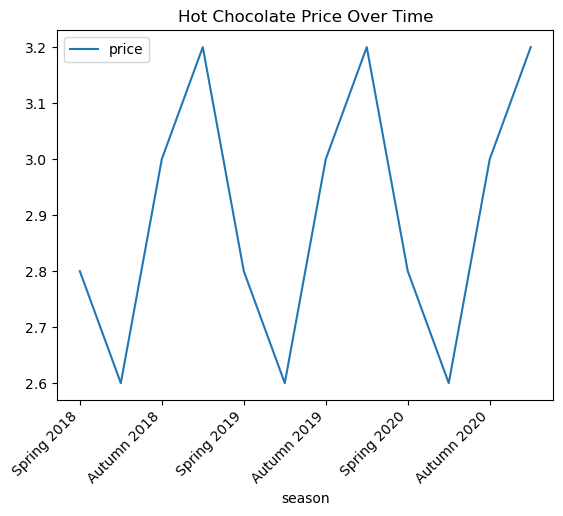

In [3]:
seasons = ["Spring 2018", "Summer 2018", "Autumn 2018", "Winter 2018",
           "Spring 2019", "Summer 2019", "Autumn 2019", "Winter 2019",
           "Spring 2020", "Summer 2020", "Autumn 2020", "Winter 2020"]

prices = [2.80, 2.60, 3.00, 3.20,
          2.80, 2.60, 3.00, 3.20,
          2.80, 2.60, 3.00, 3.20]

data = pd.DataFrame({
    'season': seasons,
    'price': prices
})

ax = data.plot.line(x='season')
ax.set_title('Hot Chocolate Price Over Time', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

#### Getting the quarterly sales example into Python and plotting the trend.

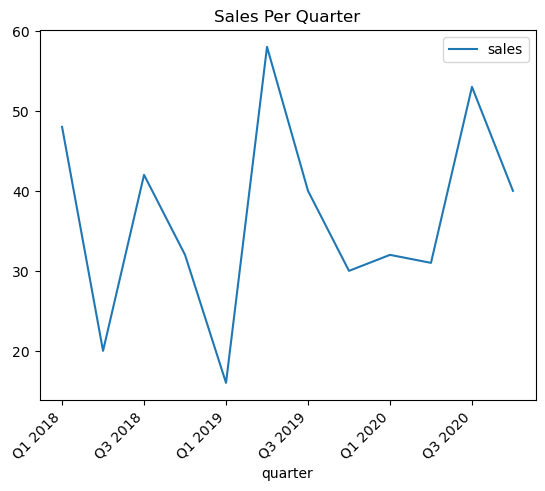

In [4]:
quarters = ["Q1 2018", "Q2 2018", "Q3 2018", "Q4 2018",
            "Q1 2019", "Q2 2019", "Q3 2019", "Q4 2019",
            "Q1 2020", "Q2 2020", "Q3 2020", "Q4 2020"]

sales = [48, 20, 42, 32,
         16, 58, 40, 30,
         32, 31, 53, 40]

data = pd.DataFrame({
    'quarter': quarters,
    'sales': sales
})

ax = data.plot.line(x='quarter')
ax.set_title('Sales Per Quarter', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

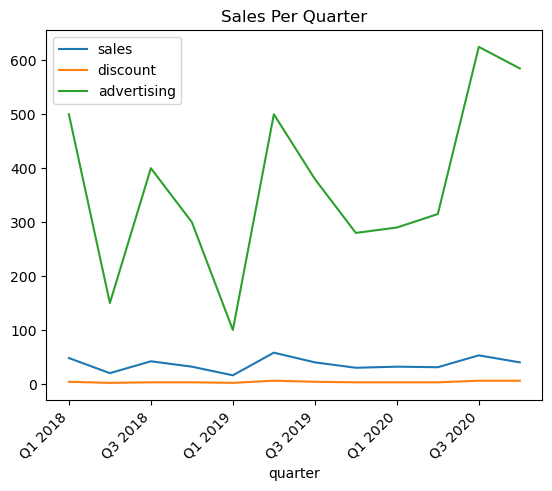

In [5]:
quarters = ["Q1 2018", "Q2 2018", "Q3 2018", "Q4 2018",
            "Q1 2019", "Q2 2019", "Q3 2019", "Q4 2019",
            "Q1 2020", "Q2 2020", "Q3 2020", "Q4 2020"]

sales = [48, 20, 42, 32,
         16, 58, 40, 30,
         32, 31, 53, 40]

discounts = [4,2,3,
             3,2,6,
             4,3,3,
             3,6,6]

advertising = [500,150,400,
               300,100,500,
               380,280,290,
               315,625,585]

data = pd.DataFrame({
    'quarter': quarters,
    'sales': sales,
    'discount': discounts,
    'advertising': advertising
})

ax = data.plot.line(x='quarter')
ax.set_title('Sales Per Quarter', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

#### Zooming in on the correlated variables of the Quarterly Sales example.

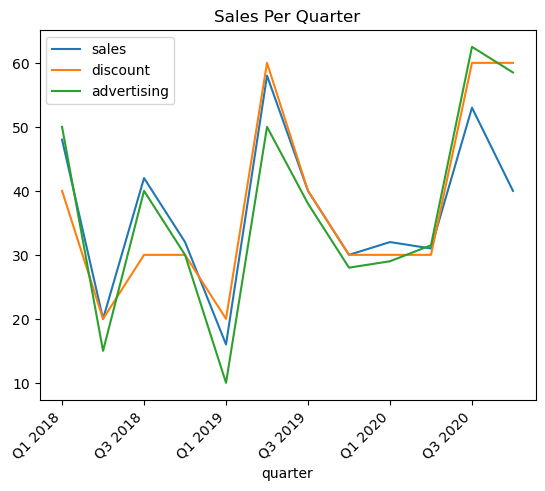

In [6]:
quarters = ["Q1 2018", "Q2 2018", "Q3 2018", "Q4 2018",
            "Q1 2019", "Q2 2019", "Q3 2019", "Q4 2019",
            "Q1 2020", "Q2 2020", "Q3 2020", "Q4 2020"]

sales = [48, 20, 42, 32,
         16, 58, 40, 30,
         32, 31, 53, 40]

discounts = [4,2,3,
             3,2,6,
             4,3,3,
             3,6,6]

discounts_scale_adjusted = [x * 10 for x in discounts]

advertising = [500,150,400,
               300,100,500,
               380,280,290,
               315,625,585]

advertising_scale_adjusted = [x / 10 for x in advertising]

data = pd.DataFrame({
    'quarter': quarters,
    'sales': sales,
    'discount': discounts_scale_adjusted,
    'advertising': advertising_scale_adjusted
})

ax = data.plot.line(x='quarter')
ax.set_title('Sales Per Quarter', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

### Correlation

In [7]:
data.drop(columns='quarter', inplace=True)

data

,sales,discount,advertising
0,48,40,50.0
1,20,20,15.0
2,42,30,40.0
3,32,30,30.0
4,16,20,10.0
5,58,60,50.0
6,40,40,38.0
7,30,30,28.0
8,32,30,29.0
9,31,30,31.5


In [8]:
data.corr()

,sales,discount,advertising
sales,1.000000,0.848135,0.902568
discount,0.848135,1.000000,0.920958
advertising,0.902568,0.920958,1.000000


# 2. Model Evaluation for Forecasting

#### Getting the stock data example into Python.

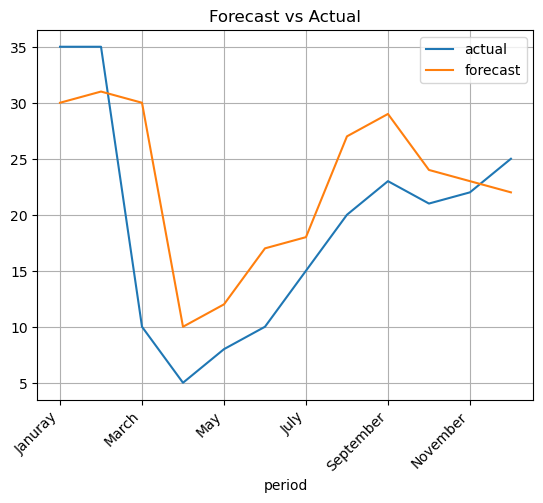

In [9]:
period = ['Januray', 'February', 'March',
         'April', 'May', 'June',
         'July', 'August', 'September',
         'October', 'November', 'December']

actual = [35, 35, 10, 
          5, 8, 10, 
          15, 20, 23, 
          21, 22, 25]

forecast = [30, 31, 30, 
              10, 12, 17, 
              18, 27, 29, 
              24, 23, 22]

data = pd.DataFrame({
    'period': period,
    'actual': actual,
    'forecast': forecast
})

ax = data.plot.line(x='period')
ax.set_title('Forecast vs Actual', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid()
plt.show()

### Model Quality Metrics

In [10]:
from sklearn.metrics import mean_squared_error

print('Mean Squared Error:',mean_squared_error(data['actual'], data['forecast']).round(4))

Mean Squared Error: 53.6667


In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print('Root Mean Squared Error:', round(sqrt(mean_squared_error(data['actual'], data['forecast'])), 4))

Root Mean Squared Error: 7.3258


In [12]:
from sklearn.metrics import mean_absolute_error

print('Mean Absolute Error:',mean_absolute_error(data['actual'], data['forecast']).round(4))

Mean Absolute Error: 5.6667


In [13]:
from sklearn.metrics import mean_absolute_percentage_error

print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(data['actual'], data['forecast']).round(4))

Mean Absolute Percentage Error: 0.4647


In [14]:
from sklearn.metrics import r2_score

print('R squared:', round(r2_score(data['actual'], data['forecast']), 4))

R squared: 0.3998


### Model Evaluation Strategies

#### Strategy 1: Train-Test Split

In [15]:
from sklearn.model_selection import train_test_split

y = data['actual']

train, test = train_test_split(y, test_size=0.3, shuffle=False)

forecast = train.mean() # forecast is 17.25

train = pd.DataFrame(train)
train['forecast'] = forecast
train_error = mean_squared_error(train['actual'], train['forecast'])

test = pd.DataFrame(test)
test['forecast'] = forecast
test_error = mean_squared_error(test['actual'], test['forecast'])

print("Train Error:",train_error)
print(" Test Error:", test_error)

Train Error: 122.9375
 Test Error: 32.4375


#### Strategy 2: Train-Validation-Test Split

In [16]:
data['actual']

0     35
1     35
2     10
3      5
4      8
5     10
6     15
7     20
8     23
9     21
10    22
11    25
Name: actual, dtype: int64

In [17]:
# Splitting into 70% train, 15% validation and 15% test
train, test = train_test_split(data['actual'], test_size = 0.3, shuffle = False, random_state=12345)
val, test = train_test_split(test, test_size = 0.5, shuffle = False, random_state=12345)

# Fit (estimate) the two models on the train data
forecast_mean = train.mean()     # 17.25
forecast_median = train.median() # 12.5

# Compute MSE on validation data for both models
val = pd.DataFrame(val)

val['forecast_mean'] = forecast_mean
val['forecast_median'] = forecast_median

val

,actual,forecast_mean,forecast_median
8,23,17.25,12.5
9,21,17.25,12.5


In [18]:
# Mean Squared Error
mean_val_mse = mean_squared_error(val['actual'], val['forecast_mean'])
median_val_mse = mean_squared_error(val['actual'], val['forecast_median'])

# You observe the following validation mse: mean mse: 23.56, median mse: 91.25
print("  Mean MSE:", mean_val_mse)
print("Median MSE:", median_val_mse) 

  Mean MSE: 23.5625
Median MSE: 91.25


In [19]:
# The best performance is the mean model, so verify its error on test data
test = pd.DataFrame(test)
test['forecast_mean'] = forecast_mean

test

,actual,forecast_mean
10,22,17.25
11,25,17.25


In [20]:
# Test MSE
mean_test_mse = mean_squared_error(test['actual'], test['forecast_mean'])

# You observe a test mse of 41.3125, almost double the validation mse
print("Test MSE:", mean_test_mse)

Test MSE: 41.3125


#### Strategy 3: Cross-Validation for Forecasting

In [21]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


# K-Fold Cross-Validation
kf = KFold(n_splits=5)

errors = []

for train_index, test_index in kf.split(data):
    train = data.iloc[train_index, :]
    test = data.iloc[test_index, :].copy() 
    
    pred = train['actual'].mean()
    test['forecast'] = pred 
    error = mean_squared_error(test['actual'], test['forecast'])
    errors.append(error)

print("MSE:",round(np.mean(errors),4))

MSE: 106.1023


In [22]:
from sklearn.model_selection import TimeSeriesSplit

# Time Series Cross-Validation
tscv = TimeSeriesSplit()

errors = []
for train_index, test_index in tscv.split(data):
    train = data.iloc[train_index,:]
    test = data.iloc[test_index,:].copy() 
    
    pred = train['actual'].mean()
    test['forecast'] = pred
    error = mean_squared_error(test['actual'], test['forecast'])
    errors.append(error)
    
print("MSE:",round(np.mean(errors),4))

MSE: 194.7652


In [23]:
from sklearn.model_selection import TimeSeriesSplit

# Rolling Time Series Cross-Validation
tscv = TimeSeriesSplit(max_train_size = 2)

errors = []

for train_index, test_index in tscv.split(data):
    train = data.iloc[train_index,:]
    test = data.iloc[test_index,:].copy()
    
    pred = train['actual'].mean()
    test['forecast'] = pred
    error = mean_squared_error(test['actual'], test['forecast'])
    errors.append(error)
    
print("MSE:",round(np.mean(errors),4))

MSE: 174.0
